In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\ashwi\Downloads\chatGPT.csv')
df.head()

,tweet,user_name,location
0,Only 17% of people say they've tried using sof...,mike_greenfield,Palo Alto
1,Latest #SouthPark amusingly tackles ChatGPT- w...,brettbirddotnet,NaN
2,@Barnacules @johnvianny Just trying to get the...,aidevcodes,NaN
3,Google search is bad and getting worse. Here's...,DataJoeG,"Texas, USA"
4,RT @AiHandbook: ChatGPT can triple productivit...,MaggsAnstey,"England, United Kingdom"


In [2]:
df.shape

(100, 3)

In [3]:
df = df.drop(["user_name", "location"], axis=1)
df.head()

,tweet
0,Only 17% of people say they've tried using sof...
1,Latest #SouthPark amusingly tackles ChatGPT- w...
2,@Barnacules @johnvianny Just trying to get the...
3,Google search is bad and getting worse. Here's...
4,RT @AiHandbook: ChatGPT can triple productivit...


In [4]:
#Preprocess tweets
import re

In [25]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#for NLP
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword= nltk.corpus.stopwords.words('english')
stopword.extend(['US', 'husband', 'rt', 'htt'])
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ashwi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [6]:
def preprocess(text):
    text = re.sub(r'http\S+', '',text)
    text = re.sub(r"\W", " ",text) # replace everything other than word and
    text = re.sub(r"\d", " ",text) # replace digit
    text = re.sub(r"RT", " ",text)
    text = re.sub(r"_", " ",text)
    text = text.lower()
    text = re.split("\W+", text) # tokenize
    text = [word for word in text if word not in stopword]
    text = " ".join(text)
    return text

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ashwi\AppData\Local\Temp\ipykernel_292292\1880884722.py:8: SyntaxWarning: invalid escape sequence '\W'
  text = re.split("\W+", text) # tokenize


In [7]:
def preprocess(text):
    text = re.sub(r'http\S+', '',text)
#text = re.sub(r"\W", " ",text)
#text = re.sub(r"\d", " ",text)
    text = re.sub(r"RT", " ",text)
    text = re.sub(r"_", " ",text)
    text = text.lower()
    text = re.split("\W+", text) # tokenize
    text = [word for word in text if word not in stopword]
    text = " ".join(text)
    return text

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ashwi\AppData\Local\Temp\ipykernel_292292\2894777208.py:8: SyntaxWarning: invalid escape sequence '\W'
  text = re.split("\W+", text) # tokenize


In [8]:
df['cleaned'] = df['tweet'].apply(lambda x:preprocess(x))

In [9]:
df.sample()

,tweet,cleaned
13,Elon Musk Fights Back Against 'Woke' AI With N...,elon musk fights back woke ai new ai platform ...


In [35]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
#for sentiment analysis
from textblob import TextBlob
# define function to get sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
# apply function to dataframe
df['sentiment'] = df['cleaned'].apply(lambda x:get_sentiment(x))

In [12]:
df.sample(3)

,tweet,cleaned,sentiment
91,RT @amtvmedia: ChatGPT is a very low level AI ...,amtvmedia chatgpt low level ai allowing peasa...,0.0
16,Ninety percent of leaders say that ChatGPT exp...,ninety percent leaders say chatgpt experience ...,0.0
84,RT @DrJimFan: Here is a sample multimodal dial...,drjimfan sample multimodal dialogue visual ch...,0.0


In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# To draw plots
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [16]:
#convert each row into list
corpus = list(df['cleaned'])
type(corpus)

list

In [17]:
# view first three elements of the corpus list
corpus[:15]

['17 people say tried using software like chatgpt lot going change number increases ',
 'latest southpark amusingly tackles chatgpt aid chatgpt ',
 ' barnacules johnvianny trying get word integrated chatgpt stable diffusion site ',
 'google search bad getting worse search evolving era ai ',
 ' aihandbook chatgpt triple productivity time collected 500 best chatgpt prompts enhance life ',
 ' aihandbook chatgpt triple productivity time collected 500 best chatgpt prompts enhance life ',
 ' writingproject created deeper dive chatgpt generative ai general goal space provide collecti ',
 ' omarsar0 history generative ai wow nice overview generative ai gan chatgpt ',
 ' omarsar0 history generative ai wow nice overview generative ai gan chatgpt ',
 ' samuelwoods marketers say chatgpt like junior writer leaving one crucial detail keep stuck ',
 ' notk us entropychase kellyknowsdaway even chatgpt says full covid chronic either ',
 ' bouchernicolas use chatgpt finance everybody talking nobody show

In [20]:
# helper function which concatenates all the data into a single corpus
def concat_list_elements(list):
    result = ' '
    for element in list:
        result += str(element+" ")
    result = result.lstrip()
    return result

In [21]:
# call the function

corpus_for_wordcloud = concat_list_elements(corpus)
corpus_for_wordcloud[:1500]
corpus_for_wordcloud

'17 people say tried using software like chatgpt lot going change number increases  latest southpark amusingly tackles chatgpt aid chatgpt   barnacules johnvianny trying get word integrated chatgpt stable diffusion site  google search bad getting worse search evolving era ai   aihandbook chatgpt triple productivity time collected 500 best chatgpt prompts enhance life   aihandbook chatgpt triple productivity time collected 500 best chatgpt prompts enhance life   writingproject created deeper dive chatgpt generative ai general goal space provide collecti   omarsar0 history generative ai wow nice overview generative ai gan chatgpt   omarsar0 history generative ai wow nice overview generative ai gan chatgpt   samuelwoods marketers say chatgpt like junior writer leaving one crucial detail keep stuck   notk us entropychase kellyknowsdaway even chatgpt says full covid chronic either   bouchernicolas use chatgpt finance everybody talking nobody showing use finance decid  okay discord thing act

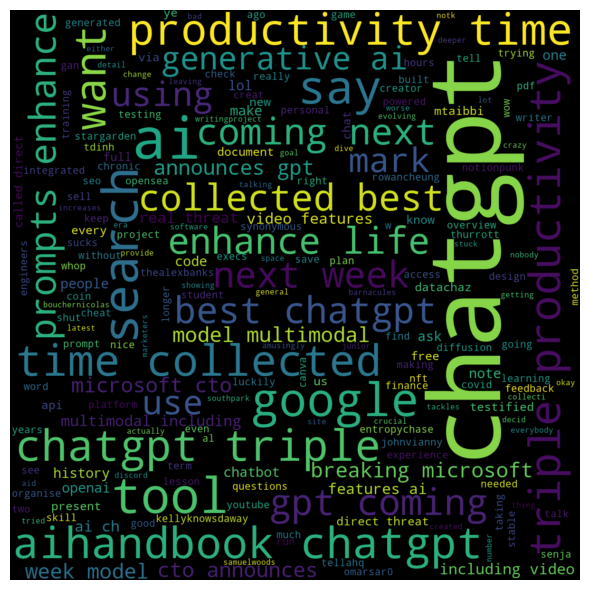

In [22]:
#plot the word cloud
wordcloud = WordCloud(height = 1200, width = 1200,
min_font_size=10).generate(corpus_for_wordcloud)
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

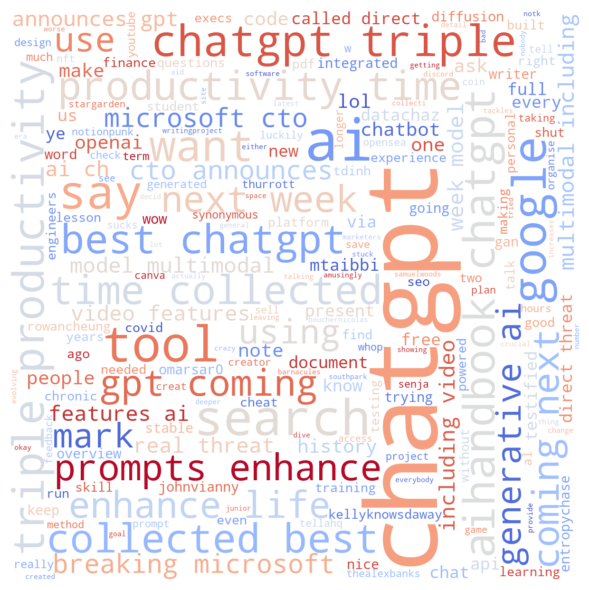

In [24]:
wordcloud = WordCloud(
    height=1200, width=1200, 
    min_font_size=10, 
    colormap='coolwarm',  # Change color theme (e.g., 'viridis', 'plasma', 'coolwarm')
    background_color="white",  # Set background color
    contour_color='steelblue',  # Add contour to words
    contour_width=2
).generate(corpus_for_wordcloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()